In [1]:
import parameter
import query 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

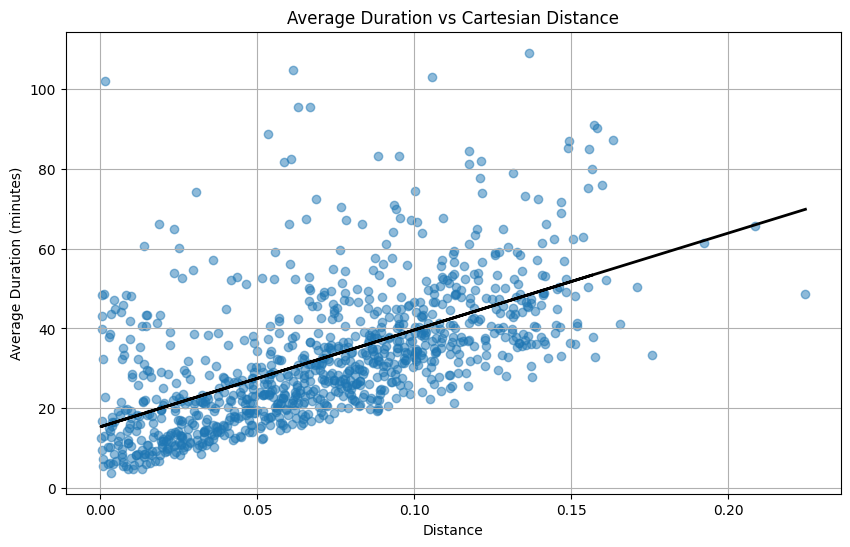

Linear Regression Equation: duration = 242.61 * distance + 15.35


In [6]:
df = pd.read_csv('data/2023/by_station/Cathedral Pkwy & Broadway.csv', low_memory=False)
df.dropna(inplace=True)
stations = df['end_station_name'].unique()
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

df['duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60.0
df = df.loc[df['duration'] <= 120]
def calculate_distance(row):
    start_lat = row['start_lat']
    start_lng = row['start_lng']
    end_lat = row['end_lat']
    end_lng = row['end_lng']
    # return np.sqrt((end_lat - start_lat)**2 + (end_lng - start_lng)**2)
    return abs((end_lat - start_lat) + (end_lng - start_lng))
df['distance'] = df.apply(calculate_distance, axis=1)
grouped = df.groupby('end_station_id').agg({'duration': 'mean', 'distance': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(grouped['distance'], grouped['duration'], alpha=0.5)

X = grouped[['distance']]  
y = grouped['duration']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.plot(grouped['distance'], y_pred, color='black', linewidth=2)
plt.title('Average Duration vs Cartesian Distance')
plt.xlabel('Distance')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.show()
print(f"Linear Regression Equation: duration = {model.coef_[0]:.2f} * distance + {model.intercept_:.2f}")
    

In [5]:
df = pd.read_csv('by_station/42 Pl & Northern Blvd.csv', low_memory=False)
df.dropna(inplace=True)
stations = df['end_station_name'].unique()
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

df['duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60.0
df = df.loc[df['duration'] <= 120]
def calculate_distance(row):
    start_lat = row['start_lat']
    start_lng = row['start_lng']
    end_lat = row['end_lat']
    end_lng = row['end_lng']
    return np.sqrt((end_lat - start_lat)**2 + (end_lng - start_lng)**2)
df['distance'] = df.apply(calculate_distance, axis=1)
grouped = df.groupby('end_station_id').agg({'duration': 'mean', 'distance': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(grouped['distance'], grouped['duration'], alpha=0.5)
plt.title('Average Duration vs Cartesian Distance')
plt.xlabel('Distance')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'by_station/42 Pl & Northern Blvd.csv'

In [14]:
def plot_and_return_regression(file_path):
    df = pd.read_csv(file_path, low_memory=False)
    df.dropna(inplace=True)
    stations = df['end_station_name'].unique()
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])

    df['duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60.0
    df = df.loc[df['duration'] <= 120]

    def calculate_distance(row):
        start_lat = row['start_lat']
        start_lng = row['start_lng']
        end_lat = row['end_lat']
        end_lng = row['end_lng']
        return np.sqrt((end_lat - start_lat) ** 2 + (end_lng - start_lng) ** 2)
        # return abs((end_lat - start_lat) + (end_lng - start_lng))

    df['distance'] = df.apply(calculate_distance, axis=1)
    grouped = df.groupby('end_station_id').agg({'duration': 'mean', 'distance': 'mean'}).reset_index()

    plt.figure(figsize=(10, 6))
    plt.scatter(grouped['distance'], grouped['duration'], alpha=0.5)

    X = grouped[['distance']]
    y = grouped['duration']
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.plot(grouped['distance'], y_pred, color='black', linewidth=2)
    plt.title('Average Duration vs Cartesian Distance')
    plt.xlabel('Distance')
    plt.ylabel('Average Duration (minutes)')
    plt.grid(True)
    plt.show()
    print(f"Linear Regression Equation: duration = {model.coef_[0]:.2f} * distance + {model.intercept_:.2f}")
    return model

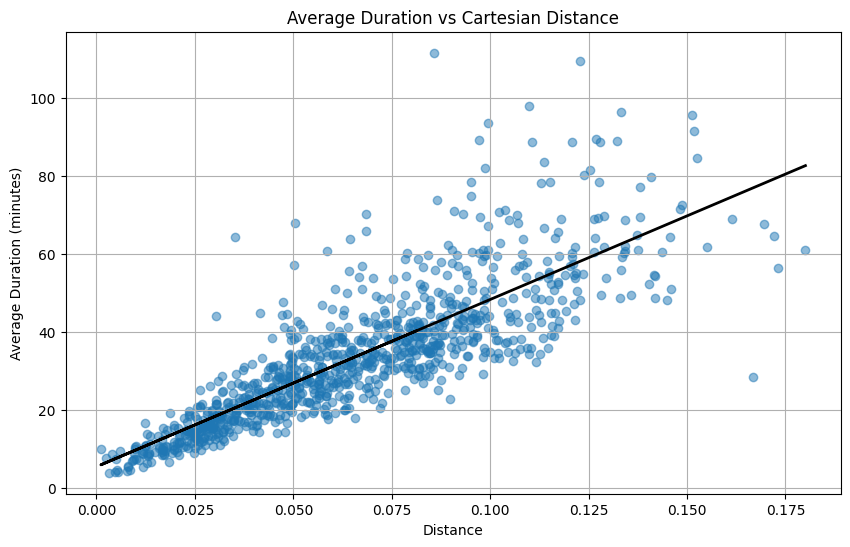

Linear Regression Equation: duration = 427.96 * distance + 5.53


LinearRegression()

In [15]:
plot_and_return_regression('data/2023/by_station/W 116 St & Broadway.csv')